In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [2]:
# path of data from my computer
path = '/home/ngoc/Documents/employee_retention_data.csv'
data = pd.read_csv(path)

In [3]:
data.head()

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  
0  2015-10-30  
1  2014-04-04  
2         NaN  
3  2013-06-07  
4  2014-08-22

In [4]:
data.shape

(24702, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [6]:
# convert join and quit date column to datetime 
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])
# creat length column equal quite - join 
data['length'] = data['quit_date'] - data['join_date']
# remove "days" in length column
data['length'] = data['length'].apply(lambda x: float(x.days))

In [7]:
data.head()

employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  length  
0 2015-10-30   585.0  
1 2014-04-04   340.0  
2        NaT     NaN  
3 2013-06-07   389.0  
4 2014-08-22  1040.0

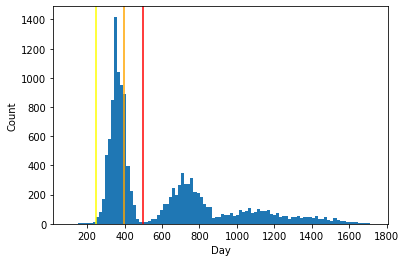

In [8]:
length1=data['length']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Day')
ax.set_ylabel('Count')
ax.hist(length1[np.isfinite(length1)],bins=100)
ax.axvline(x=500,color='red')
ax.axvline(x=395,color='orange')
ax.axvline(x=250,color='yellow')
plt.show()

In [9]:
data[data['seniority'] < 6]

employee_id  company_id              dept  seniority    salary  \
7         716309.0           2  customer_service          4   30000.0   
12        939058.0           1         marketing          1   48000.0   
15        265226.0           1      data_science          4   80000.0   
28        888375.0           1  customer_service          5   75000.0   
41        489148.0           2          engineer          5  192000.0   
...            ...         ...               ...        ...       ...   
24677     670093.0           1          engineer          4   72000.0   
24686     541539.0           5         marketing          5  109000.0   
24687     370156.0           3  customer_service          5   64000.0   
24688     261770.0           3          engineer          2   66000.0   
24695      63273.0           1      data_science          5  172000.0   

       join_date  quit_date  length  
7     2014-03-05        NaT     NaN  
12    2012-12-10 2013-11-15   340.0  
15    2014-05-27 2015-07-10   409.0  
28    2011-08-01 2013-10-04   795.0  
41    2014-04-21        NaT     NaN  
...          ...        ...     ...  
24677 2012-04-09 2013-05-10   396.0  
24686 2013-04-15 2014-04-21   371.0  
24687 2013-09-23 2015-07-10   655.0  
24688 2014-05-12        NaT     NaN  
24695 2012-05-01 2015-06-26  1151.0  

[4515 rows x 8 columns]

In [10]:
# function to use apply
def abc(row):
    if row['length'] < 395 or row['quit_date'] == np.nan:
        val = 1
    else: 
        val = 0 
    return val

In [11]:
data['status'] = data.apply(abc, axis=1)

In [12]:
# one hot encoding dept 
dept= pd.get_dummies(data['dept'])
data = pd.concat([data, dept], axis=1)
data.head()

employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  length  status  customer_service  data_science  design  \
0 2015-10-30   585.0       0                 1             0       0   
1 2014-04-04   340.0       1                 0             0       0   
2        NaT     NaN       0                 0             0       0   
3 2013-06-07   389.0       1                 1             0       0   
4 2014-08-22  1040.0       0                 0             1       0   

   engineer  marketing  sales  
0         0          0      0  
1         0          1      0  
2         0          1      0  
3         0          0      0  
4         0          0      0

In [13]:
# get some features for build machine learning model
X = data[['company_id', 'seniority', 'salary', 'length', 'customer_service','data_science', 'design', 'engineer', 'marketing', 'sales']]
# targer assign to Y
Y = data[['status']].values.ravel()

In [14]:
# fill nan
X = X.fillna(-2)


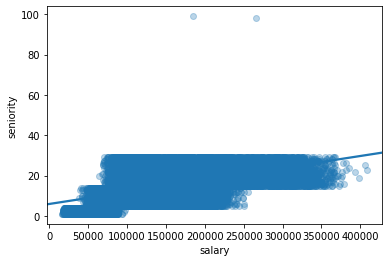

In [15]:
sns.regplot(x="salary", y="seniority", data=data, scatter_kws={'alpha':0.3});

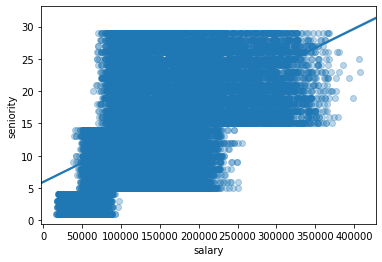

In [16]:
sns.regplot(x="salary", y="seniority", data=data[data['seniority']<40], scatter_kws={'alpha':0.3});

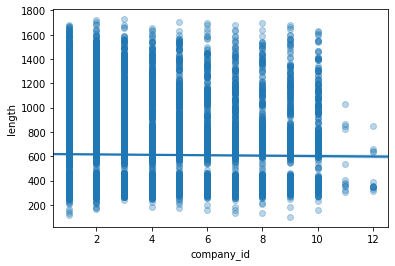

In [17]:
sns.regplot(x="company_id", y="length", data=data, scatter_kws={'alpha':0.3});

In [18]:
# sns.regplot(x="company_id", y="month", data=data, scatter_kws={'alpha':0.3});

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=2019)


In [20]:
# machine learning model
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' DST ' , DecisionTreeClassifier(max_depth=4, max_features=6)))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))

 LR : 0.77
 LDA : 0.77
 KNN : 0.98
 DST : 0.98
 NB : 0.96
 SVM : 0.77


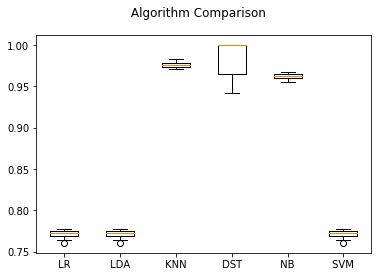

In [22]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=2019, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f" % (name, cv_results.mean())
    print(msg)
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
data.head()

In [37]:
# data['m'] = data['quit_date'] - data['join_date']
# remove "days" in length columnonth
data['month'] = round(data['length']/30, 1)


In [38]:
data.head()

employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  length  status  customer_service  data_science  design  \
0 2015-10-30   585.0       0                 1             0       0   
1 2014-04-04   340.0       1                 0             0       0   
2        NaT     NaN       0                 0             0       0   
3 2013-06-07   389.0       1                 1             0       0   
4 2014-08-22  1040.0       0                 0             1       0   

   engineer  marketing  sales  month  
0         0          0      0   19.5  
1         0          1      0   11.3  
2         0          1      0    NaN  
3         0          0      0   13.0  
4         0          0      0   34.7

In [39]:
# data = data.fillna(-2)
X = data[['company_id','month', 'seniority', 'salary', 'customer_service','data_science', 'design', 'engineer', 'marketing', 'sales']]
Y = data[['status']].values.ravel()
X = X.fillna(-2)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state=2019) 

 LR : 0.77
 LDA : 0.77
 KNN : 0.93
 DST : 0.95
 NB : 0.93
 SVM : 0.77


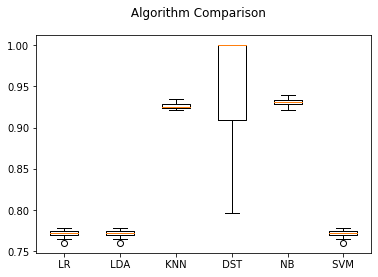

In [69]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=2019, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f" % (name, cv_results.mean())
    print(msg)
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [158]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
estimators = []
model1 = LogisticRegression()

estimators.append(( ' logistic ' , model1))
model2 = DecisionTreeClassifier()
estimators.append(( ' cart ' , model2))

model3 = SVC()
estimators.append(( ' svc ' , model3))

model4 = KNeighborsClassifier()
estimators.append(( ' KNN ', model4))

model5 = GaussianNB()
estimators.append(( 'NB ', model5))

# model6 =  LinearDiscriminantAnalysis()
# estimators.append(( ' LDA ', model6))
# create the ensemble model
ensemble = VotingClassifier(estimators, voting='hard')
# results = cross_val_score(ensemble, X, Y, cv=kfold)
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[(' logistic ',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             (' cart ',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion...
                                  ga

In [159]:
print(ensemble.score(X_test, y_test))

0.9717860647693818


In [77]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7674190382728164

In [85]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

In [117]:
dt = DecisionTreeClassifier(max_depth= 4, max_features= 6, max_leaf_nodes=13)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9251717369970559

In [148]:
fr = RandomForestClassifier(max_depth=4, max_leaf_nodes=5)
fr.fit(X_train, y_train)
fr.score(X_test, y_test)

0.8949950932286556

In [154]:
svc = SVC()
lvd = LinearDiscriminantAnalysis()

In [155]:
evc = VotingClassifier(estimators = [('lr', lr), ('nb', nb), ('dt', dt), ('fr', fr), ('svc', svc), ('lvd', lvd)], voting='hard')

In [156]:
evc.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('dt',
                              DecisionTreeClassifie...
                                  class_weight=None, coef0=0.0,
                      

In [157]:
evc.score(X_test, y_test)

0.7674190382728164